In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Anupam\Downloads\loan.csv")

In [3]:
df.head()

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,NaN,NaN,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,24891,2019,cf,Male,type2,p1,b/c,206500,NaN,NaN,NaN,pr,4980.0,EQUI,552,EXP,55-64,NaN,North,1
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.56,595.0,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.25,NaN,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.00,0.0,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0


In [4]:
df.shape

(148670, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148670 non-null  int64  
 1   year                      148670 non-null  int64  
 2   loan_limit                145326 non-null  object 
 3   Gender                    148670 non-null  object 
 4   loan_type                 148670 non-null  object 
 5   loan_purpose              148536 non-null  object 
 6   business_or_commercial    148670 non-null  object 
 7   loan_amount               148670 non-null  int64  
 8   rate_of_interest          112231 non-null  float64
 9   Upfront_charges           109028 non-null  float64
 10  property_value            133572 non-null  float64
 11  occupancy_type            148670 non-null  object 
 12  income                    139520 non-null  float64
 13  credit_type               148670 non-null  o

In [6]:
# Checking the duplicates in the dataset
df.duplicated().sum()

0

In [7]:
#Checking the categorical Columns:
df.describe(include='object').T

,count,unique,top,freq
loan_limit,145326,2,cf,135348
Gender,148670,4,Male,42346
loan_type,148670,3,type1,113173
loan_purpose,148536,4,p3,55934
business_or_commercial,148670,2,nob/c,127908
occupancy_type,148670,3,pr,138201
credit_type,148670,4,CIB,48152
co-applicant_credit_type,148670,2,CIB,74392
age,148470,7,45-54,34720
Region,148670,4,North,74722


In [8]:
#Checking the the Numerical Columns:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,173559.00
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2019.00
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3576500.00
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,60000.00
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,16508000.00
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,578580.00
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,900.00
LTV,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7831.25
Status,148670.0,0.246445,0.430942,0.000000,0.00000,0.00000,0.000000,1.00


# Data Cleaning

In [10]:
# Checking Null Values
df.isnull().sum()

ID                              0
year                            0
loan_limit                   3344
Gender                          0
loan_type                       0
loan_purpose                  134
business_or_commercial          0
loan_amount                     0
rate_of_interest            36439
Upfront_charges             39642
property_value              15098
occupancy_type                  0
income                       9150
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
LTV                         15098
Region                          0
Status                          0
dtype: int64

In [11]:
df1 = df.copy()

In [12]:
df1['loan_amount'].fillna(df1['loan_amount'].median(), inplace=True)
df1['rate_of_interest'].fillna(df1['rate_of_interest'].median(), inplace=True)
df1['Upfront_charges'].fillna(df1['Upfront_charges'].median(),inplace = True)
df1['property_value'].fillna(df1['property_value'].median(),inplace = True)
df1['LTV'].fillna(df1['LTV'].median(),inplace =True)
df1['income'].fillna(df1['income'].median(),inplace = True)
df1['loan_limit'].fillna(df1['loan_limit'].mode()[0], inplace=True)
df1['age'].fillna(df1['age'].mode()[0],inplace = True)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148670 non-null  int64  
 1   year                      148670 non-null  int64  
 2   loan_limit                148670 non-null  object 
 3   Gender                    148670 non-null  object 
 4   loan_type                 148670 non-null  object 
 5   loan_purpose              148536 non-null  object 
 6   business_or_commercial    148670 non-null  object 
 7   loan_amount               148670 non-null  int64  
 8   rate_of_interest          148670 non-null  float64
 9   Upfront_charges           148670 non-null  float64
 10  property_value            148670 non-null  float64
 11  occupancy_type            148670 non-null  object 
 12  income                    148670 non-null  float64
 13  credit_type               148670 non-null  o

# Outliers Detection

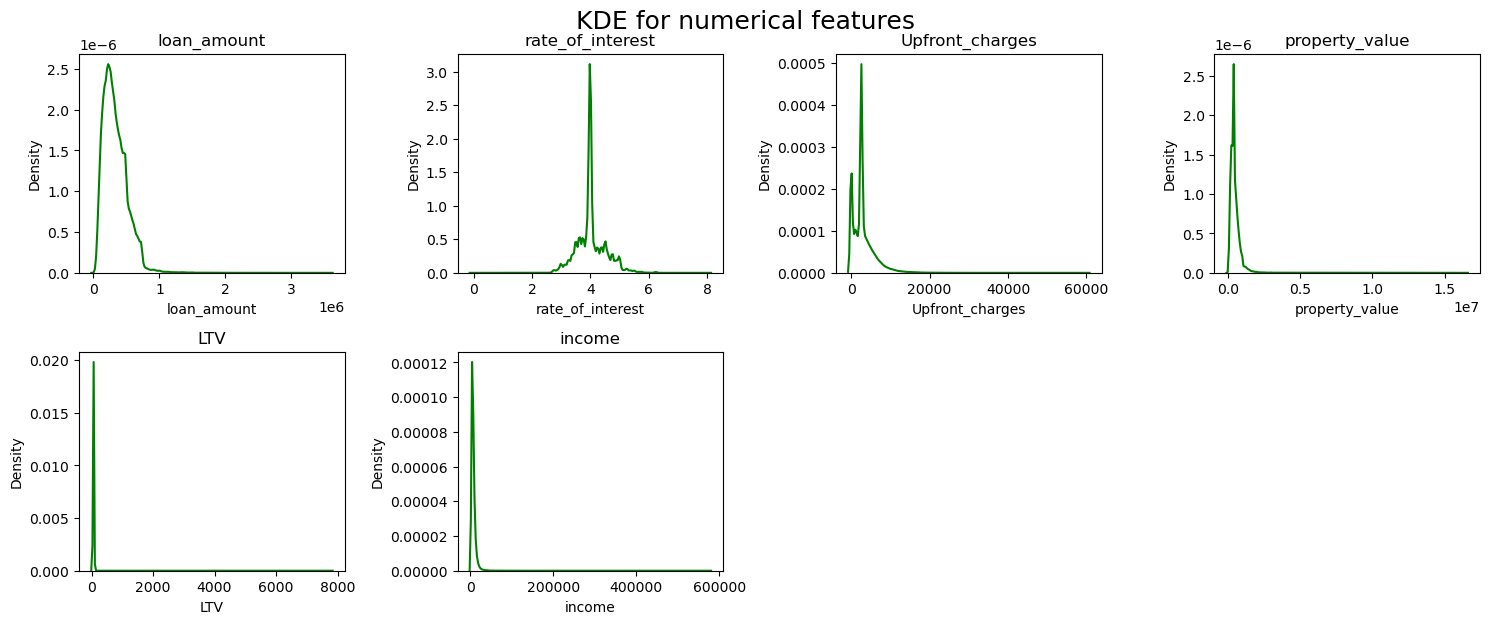

In [15]:
# KDE for numerical columns
num_columns = ['loan_amount','rate_of_interest','Upfront_charges', 'property_value', 'LTV', 'income']

plt.figure(figsize=(15,15))
for i, elem in enumerate(num_columns):
  plt.subplot(5,4,i+1)
  sns.kdeplot(df1[elem], color='green')
  plt.title(elem)

plt.suptitle("KDE for numerical features", fontsize = 18)
plt.tight_layout()
plt.show()

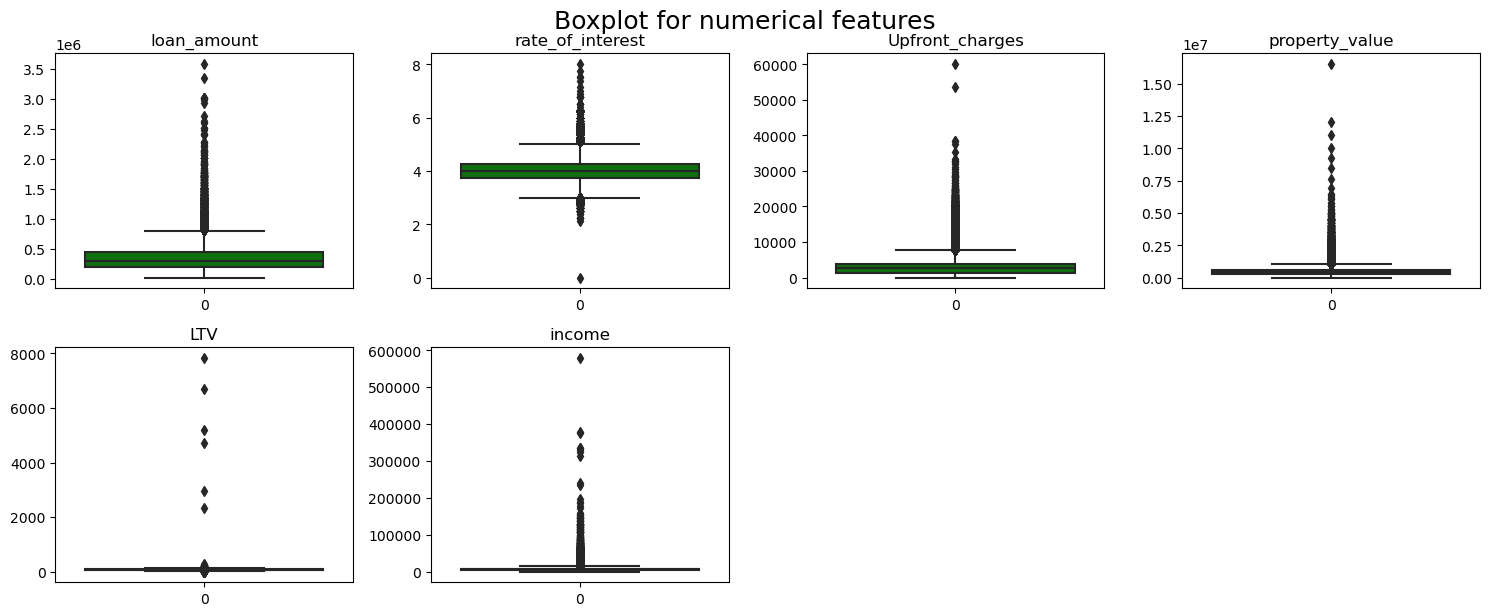

In [16]:
# Boxplot for numerical columns
num_columns = ['loan_amount','rate_of_interest','Upfront_charges', 'property_value', 'LTV', 'income']

plt.figure(figsize=(15,15))
for i, elem in enumerate(num_columns):
  plt.subplot(5,4,i+1)
  sns.boxplot(df1[elem], color='green')
  plt.title(elem)

plt.suptitle("Boxplot for numerical features", fontsize = 18)
plt.tight_layout()
plt.show()

In [17]:
# Function to remove outlier using IQR 
def iterative_iqr_outlier_removal(data, column, multiplier=1.5):
    
    while True:
        # Calculate Q1, Q3, and IQR
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Identify outliers
        before_removal = data.shape[0]
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
        after_removal = data.shape[0]
        
        # Stop if no more outliers are removed
        if before_removal == after_removal:
            break
    
    return data

In [18]:
#Function to remove outlier using Z-Score
from scipy.stats import zscore

def iterative_zscore_removal(data, column, threshold=2.5):
    
    while True:
        # Calculate Z-scores for the column
        z_scores = zscore(data[column])
        
        # Identify outliers
        outliers = abs(z_scores) > threshold
        num_outliers = outliers.sum()
        
        # Stop if no more outliers are found
        if num_outliers == 0:
            break
        
        # Remove rows with outliers
        data = data[~outliers]
    
    return data

In [19]:
#Removing the outliers

df1 = iterative_iqr_outlier_removal(df1, 'loan_amount', multiplier=1.5)

df1 = iterative_iqr_outlier_removal(df1, 'Upfront_charges', multiplier=1.5)

df1 = iterative_iqr_outlier_removal(df1, 'property_value', multiplier=1.5)

df1 = iterative_iqr_outlier_removal(df1, 'LTV', multiplier=1.5)

df1 = iterative_iqr_outlier_removal(df1, 'income', multiplier=1.5)

df1 = iterative_zscore_removal(df1, 'rate_of_interest', threshold=2.5)

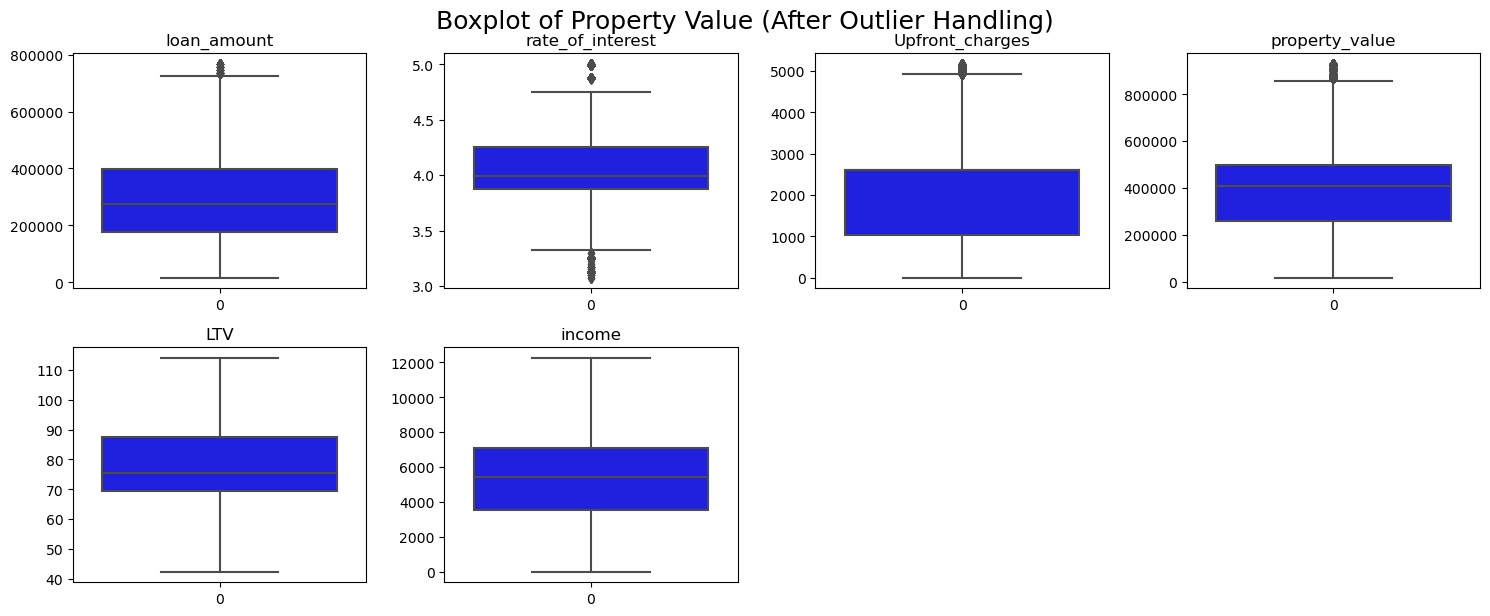

In [20]:
# Boxplot for numerical columns after removal of outliers
num_columns = ['loan_amount','rate_of_interest','Upfront_charges', 'property_value', 'LTV', 'income']

plt.figure(figsize=(15,15))
for i, elem in enumerate(num_columns):
  plt.subplot(5,4,i+1)
  sns.boxplot(df1[elem], color='Blue')
  plt.title(elem)

plt.suptitle("Boxplot of Property Value (After Outlier Handling)", fontsize = 18)
plt.tight_layout()
plt.show()

# Data Handling with Categorical Column

In [22]:
df1['Gender'].groupby(df1['Gender']).count()

Gender
Female               19395
Joint                25039
Male                 29213
Sex Not Available    24510
Name: Gender, dtype: int64

In [23]:
# Calculate the probability of each gender
gender_distribution = df1['Gender'][df1['Gender'] != 'Sex Not Available'].value_counts(normalize=True)

# Replace 'Sex Not Available' with a random choice based on the distribution
def replace_with_random(data):
    return np.random.choice(gender_distribution.index, p=gender_distribution.values)

# Apply the replacement
df1['Gender'] = df1['Gender'].apply(lambda x: replace_with_random(df1) if x == 'Sex Not Available' else x)

In [24]:
df1['loan_type'].value_counts()

type1    69416
type2    18247
type3    10494
Name: loan_type, dtype: int64

In [25]:
df1['business_or_commercial'].value_counts()

nob/c    79910
b/c      18247
Name: business_or_commercial, dtype: int64

In [26]:
df1['occupancy_type'].value_counts()

pr    93389
ir     3134
sr     1634
Name: occupancy_type, dtype: int64

In [27]:
df1['occupancy_type'] = df1['occupancy_type'].replace(to_replace='pr', value='Primary Residence', regex=True)

df1['occupancy_type'] = df1['occupancy_type'].replace(to_replace='ir', value='Investment Residence', regex=True)

df1['occupancy_type'] = df1['occupancy_type'].replace(to_replace='sr', value='Secondary Residence', regex=True)

In [28]:
df1['credit_type'].value_counts()

CIB     29862
CRIF    27809
EXP     26683
EQUI    13803
Name: credit_type, dtype: int64

In [29]:
df1['co-applicant_credit_type'].value_counts()

CIB    50136
EXP    48021
Name: co-applicant_credit_type, dtype: int64

In [30]:
df1['age'].value_counts()

35-44    22448
45-54    21779
55-64    20283
25-34    14788
65-74    13319
>74       4410
<25       1130
Name: age, dtype: int64

In [31]:
df1['Region'].value_counts()

North         50236
south         41205
central        5848
North-East      868
Name: Region, dtype: int64

In [32]:
df1['Status'].value_counts()

0    66854
1    31303
Name: Status, dtype: int64

In [33]:
df1['loan_limit'].value_counts()

cf     93164
ncf     4993
Name: loan_limit, dtype: int64

# Statistical Testing for Loan Default Analysis






To determine the impact of various factors on loan default, we perform statistical tests on different columns.

In [36]:
from scipy.stats import chi2_contingency

# List of categorical columns to test
categorical_cols = ['loan_limit', 'Gender', 'loan_type', 'loan_type','loan_purpose','occupancy_type', 'business_or_commercial','credit_type','co-applicant_credit_type','age','Region']

# Perform Chi-Square test for each variable
for col in categorical_cols:
    if col in df1.columns:
        print(f"\n🔹 Chi-Square Test: {col} vs. Loan Default Status")
        
        # Create a contingency table
        contingency_table = pd.crosstab(df1['Status'], df1[col])
        
        # Perform the Chi-Square test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

        print(f"Chi-Square Statistic: {chi2_stat:.4f}")
        print(f"P-value: {p_value:.4f}")
        print(f"Degrees of Freedom: {dof}")

        # Hypothesis Interpretation
        if p_value < 0.05:
            print(f"✅ Significant Relationship: {col} influences loan default.")
        else:
            print(f"❌ No Significant Relationship: {col} does not strongly impact loan default.")


🔹 Chi-Square Test: loan_limit vs. Loan Default Status
Chi-Square Statistic: 66.2782
P-value: 0.0000
Degrees of Freedom: 1
✅ Significant Relationship: loan_limit influences loan default.

🔹 Chi-Square Test: Gender vs. Loan Default Status
Chi-Square Statistic: 267.5321
P-value: 0.0000
Degrees of Freedom: 2
✅ Significant Relationship: Gender influences loan default.

🔹 Chi-Square Test: loan_type vs. Loan Default Status
Chi-Square Statistic: 307.2405
P-value: 0.0000
Degrees of Freedom: 2
✅ Significant Relationship: loan_type influences loan default.

🔹 Chi-Square Test: loan_type vs. Loan Default Status
Chi-Square Statistic: 307.2405
P-value: 0.0000
Degrees of Freedom: 2
✅ Significant Relationship: loan_type influences loan default.

🔹 Chi-Square Test: loan_purpose vs. Loan Default Status
Chi-Square Statistic: 489.0424
P-value: 0.0000
Degrees of Freedom: 3
✅ Significant Relationship: loan_purpose influences loan default.

🔹 Chi-Square Test: occupancy_type vs. Loan Default Status
Chi-Square

# Observation from Chi-Square Tests

In [38]:
from scipy.stats import ttest_ind

# List of continuous features to test
continuous_features = ['loan_amount', 'rate_of_interest', 'property_value', 'Upfront_charges', 'income', 'Credit_Score', 'LTV']

# Extract unique loan statuses
statuses = df1['Status'].unique()

if len(statuses) < 2:
    print("Not enough distinct Status values for T-test.")
else:
    default_label = statuses[0]  # Assign first unique value as 'Default'
    non_default_label = statuses[1]  # Assign second unique value as 'Non-Default'

    print("\n=== T-Test Results ===\n")

    # Perform T-Test for each feature
    for feature in continuous_features:
        if feature in df1.columns:
            group1 = df1[df1['Status'] == default_label][feature].dropna()
            group2 = df1[df1['Status'] == non_default_label][feature].dropna()

            if group1.empty or group2.empty:
                print(f"Skipping {feature}: One or both groups have no data.")
                continue

            # Perform Welch's T-test
            t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

            print(f"Feature: {feature}")
            print(f"   T-Statistic: {t_stat:.4f}")
            print(f"   P-Value: {p_value:.6f}")

            # Hypothesis Interpretation
            if p_value < 0.05:
                print("   🔴 Significant difference detected (Reject Null Hypothesis)\n")
            else:
                print("   🟢 No significant difference (Fail to Reject Null Hypothesis)\n")



=== T-Test Results ===

Feature: loan_amount
   T-Statistic: -15.3965
   P-Value: 0.000000
   🔴 Significant difference detected (Reject Null Hypothesis)

Feature: rate_of_interest
   T-Statistic: -41.9661
   P-Value: 0.000000
   🔴 Significant difference detected (Reject Null Hypothesis)

Feature: property_value
   T-Statistic: -16.9297
   P-Value: 0.000000
   🔴 Significant difference detected (Reject Null Hypothesis)

Feature: Upfront_charges
   T-Statistic: 99.3680
   P-Value: 0.000000
   🔴 Significant difference detected (Reject Null Hypothesis)

Feature: income
   T-Statistic: -40.6437
   P-Value: 0.000000
   🔴 Significant difference detected (Reject Null Hypothesis)

Feature: Credit_Score
   T-Statistic: 0.9850
   P-Value: 0.324645
   🟢 No significant difference (Fail to Reject Null Hypothesis)

Feature: LTV
   T-Statistic: 13.4216
   P-Value: 0.000000
   🔴 Significant difference detected (Reject Null Hypothesis)



# Observation from the T-Test Results

# Correlation Analysis 

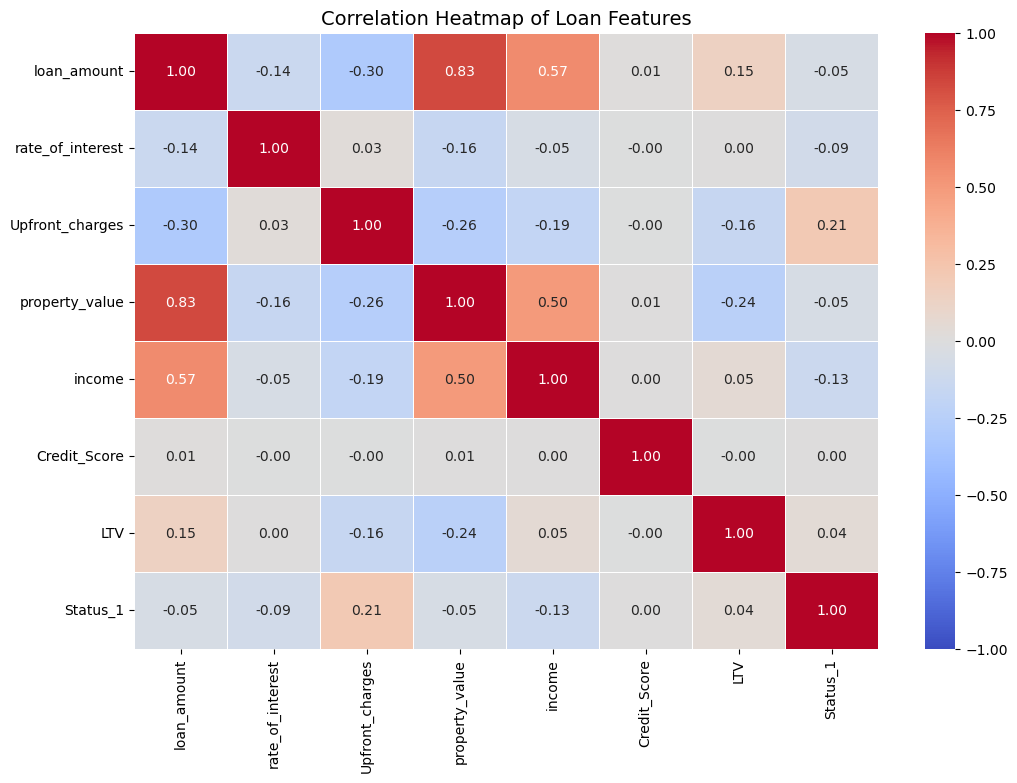

In [41]:
selected_cols = ['loan_amount', 'rate_of_interest', 'Upfront_charges', 'property_value',
                 'income', 'Credit_Score', 'LTV', 'Status']

# Convert categorical variable 'Status' into numerical (if needed)
corr_df = pd.get_dummies(df1[selected_cols], columns=["Status"], drop_first=True)  # Avoid redundant columns

# Compute correlation
corr_matrix = corr_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Title
plt.title("Correlation Heatmap of Loan Features", fontsize=14)
plt.show()

# Univariate Analysis

1. Distribution of confirmed and non-confirmed loans

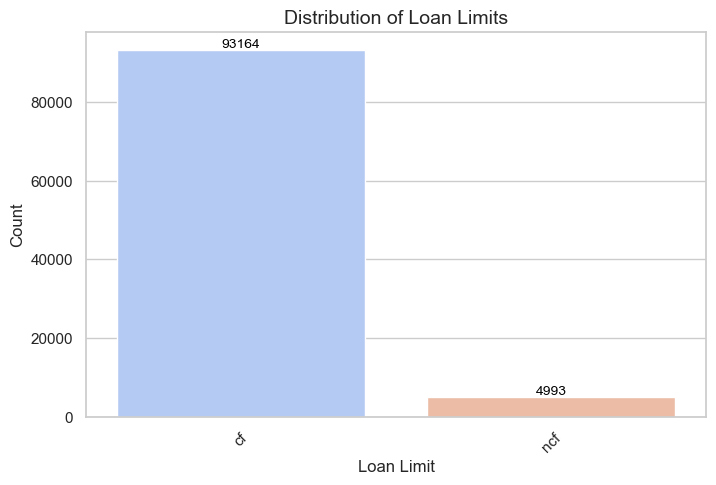

In [44]:
# Set plot style
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(8, 5))

# Create a count plot with improved colors
ax = sns.countplot(
    data=df1, 
    x='loan_limit', 
    order=df1['loan_limit'].value_counts().index,
    palette="coolwarm"
)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),  # No decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'bottom',
        fontsize=10, color='black'
    )

# Customize plot labels
plt.title("Distribution of Loan Limits", fontsize=14)
plt.xlabel("Loan Limit", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  # Rotate x labels if needed

# Show plot
plt.show()

2. Gender Distribution in Loan Applications

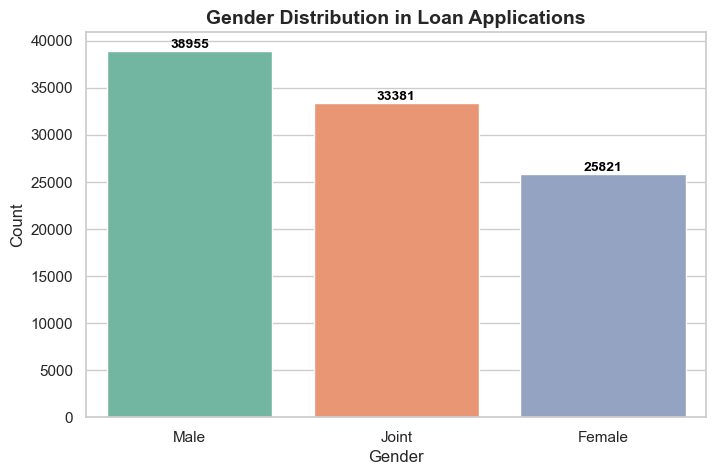

In [46]:
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(8, 5))

# Generate count plot with improved colors
ax = sns.countplot(
    data=df1, 
    x='Gender', 
    order=df1['Gender'].value_counts().index, 
    palette="Set2"
)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Convert count to integer
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', 
        fontsize=10, color='black', fontweight='bold'
    )

# Customize plot labels
plt.title("Gender Distribution in Loan Applications", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels only if necessary
if len(df1['Gender'].unique()) > 5:
    plt.xticks(rotation=45)

# Display the plot
plt.show()

3.Distribution of Business or Commercial Loans

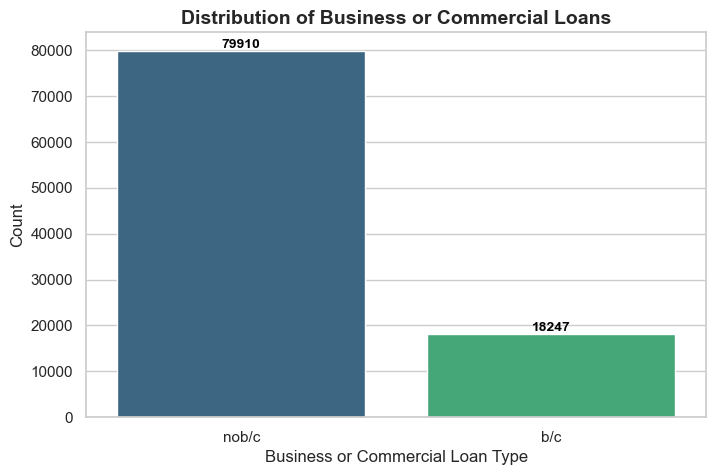

In [48]:
# Set seaborn style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(8, 5))

# Generate count plot
ax = sns.countplot(
    data=df1, 
    x='business_or_commercial', 
    order=df1['business_or_commercial'].value_counts().index, 
    palette="viridis"
)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Convert count to integer
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', 
        fontsize=10, color='black', fontweight='bold'
    )

# Corrected Titles & Labels
plt.title("Distribution of Business or Commercial Loans", fontsize=14, fontweight="bold")
plt.xlabel("Business or Commercial Loan Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels only if needed
if len(df1['business_or_commercial'].unique()) > 5:
    plt.xticks(rotation=45)

# Show the plot
plt.show()

4.Distribution of Occupancy Type

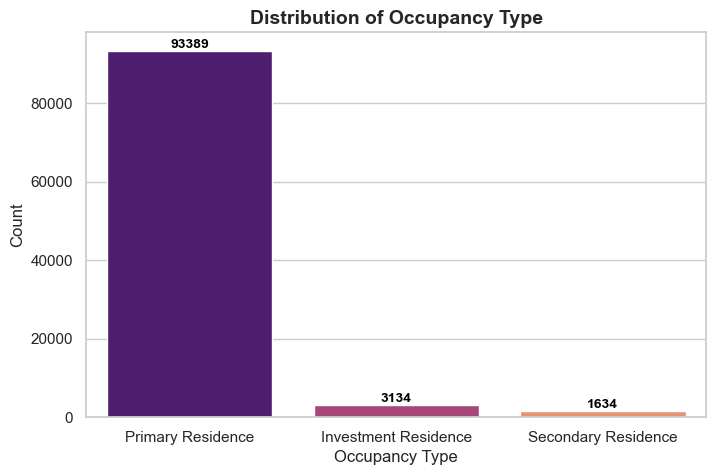

In [50]:
# Set seaborn style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(8, 5))

# Generate count plot
ax = sns.countplot(
    data=df1, 
    x='occupancy_type', 
    order=df1['occupancy_type'].value_counts().index, 
    palette="magma"
)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Convert count to integer
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', 
        fontsize=10, color='black', fontweight='bold'
    )

# Corrected Titles & Labels
plt.title("Distribution of Occupancy Type", fontsize=14, fontweight="bold")
plt.xlabel("Occupancy Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels only if needed
if len(df1['occupancy_type'].unique()) > 5:
    plt.xticks(rotation=45)

# Show the plot
plt.show()


5. Distribution between Defaulters And Non- Defaulters

In [52]:
df1['Status'] = df['Status'].replace({0:'Non-Defaulter',1:'Defaulter'})

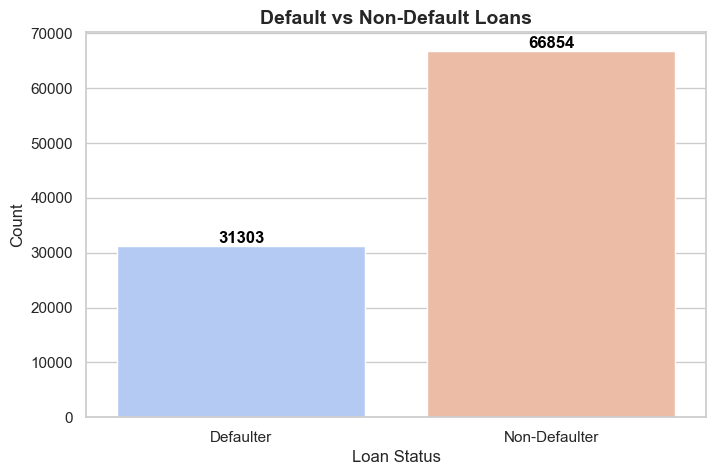

In [53]:
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(8, 5))

# Generate count plot with improved palette
ax = sns.countplot(
    data=df1, 
    x='Status', 
    palette='coolwarm'
)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Convert count to integer
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', 
        fontsize=12, color='black', fontweight='bold'
    )

# Set titles and labels
plt.title("Default vs Non-Default Loans", fontsize=14, fontweight="bold")
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()


# Bivariate & Multivariate Analysis 

In [55]:
# Creating bins,Credit score range
bins = [500, 600, 700, 800, 900]  
labels = ['Poor (500-600)', 'Fair (600-700)', 'Good (700-800)', 'Excellent (800-900)']
df1['Credit_Score_Range'] = pd.cut(df1['Credit_Score'], bins=bins, labels=labels, right=False)



In [56]:
# Calculate Default Rates for Each Range
credit_score_analysis = df1.groupby('Credit_Score_Range')['Status'].value_counts(normalize=True).unstack()
credit_score_analysis['Default_Rate'] = credit_score_analysis.get('Defaulter', 0) * 100  # Convert to percentage

6.Default Rate by Credit Score Range

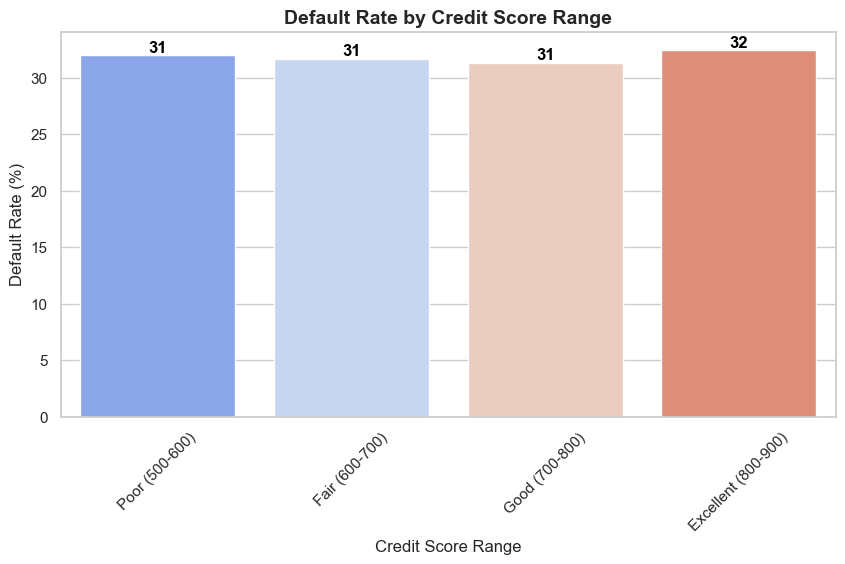

In [58]:
# Plot Default Rate by Credit Score Range
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=credit_score_analysis.index, y=credit_score_analysis['Default_Rate'], palette="coolwarm")
# Add value labels on bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Convert count to integer
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', 
        fontsize=12, color='black', fontweight='bold'
    )


plt.title("Default Rate by Credit Score Range", fontsize=14, fontweight="bold")
plt.xlabel("Credit Score Range", fontsize=12)
plt.ylabel("Default Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


7.Average Loan Amount by Loan Type and Default Status

<Figure size 1000x600 with 0 Axes>

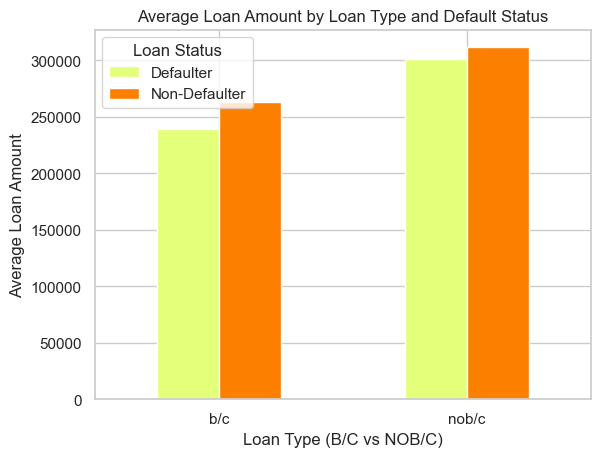

In [60]:
plt.figure(figsize=(10, 6))
df1.groupby(['business_or_commercial', 'Status'])['loan_amount'].mean().unstack().plot(kind='bar', colormap='Wistia')
plt.title("Average Loan Amount by Loan Type and Default Status")
plt.xlabel("Loan Type (B/C vs NOB/C)")
plt.ylabel("Average Loan Amount")
plt.legend(title="Loan Status")
plt.xticks(rotation=0)
plt.show()


8.Average LTV Ratio by Loan Type and Default Status

<Figure size 1000x600 with 0 Axes>

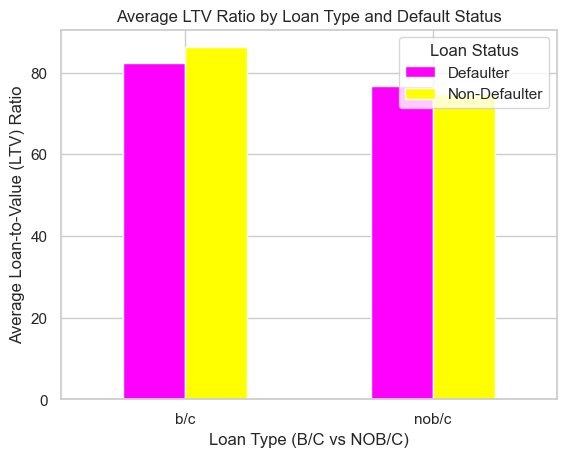

In [62]:
plt.figure(figsize=(10, 6))
df1.groupby(['business_or_commercial', 'Status'])['LTV'].mean().unstack().plot(kind='bar', colormap='spring')
plt.title("Average LTV Ratio by Loan Type and Default Status")
plt.xlabel("Loan Type (B/C vs NOB/C)")
plt.ylabel("Average Loan-to-Value (LTV) Ratio")
plt.legend(title="Loan Status")
plt.xticks(rotation=0)
plt.show()


9.Default Rates by Loan Purpose

<Figure size 1200x600 with 0 Axes>

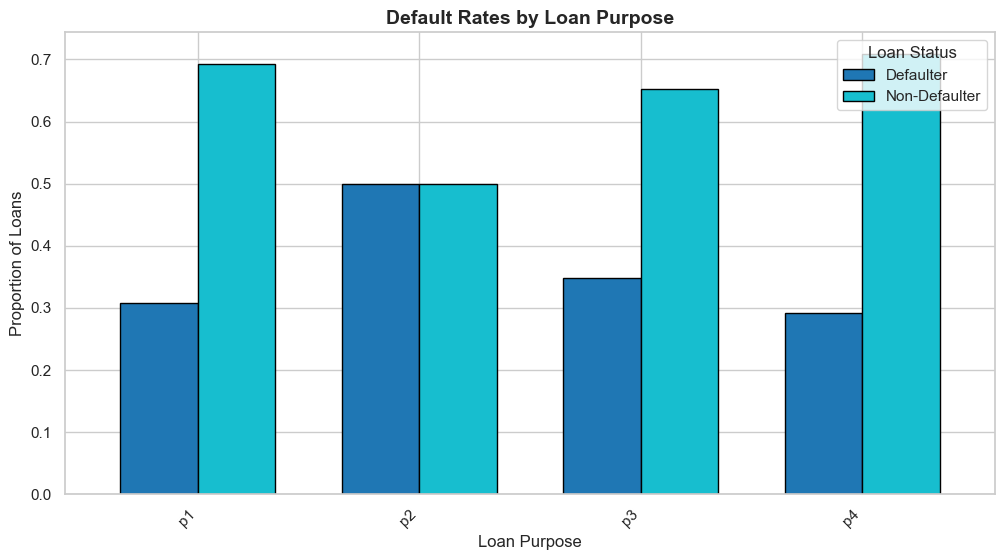

In [64]:
plt.figure(figsize=(12, 6))

# Calculate default rates for each loan purpose
default_rates = df1.groupby('loan_purpose')['Status'].value_counts(normalize=True).unstack()

# Plot the bar chart
default_rates.plot(kind='bar', figsize=(12, 6), colormap='tab10', edgecolor='black', width=0.7)

# Customize plot title and labels
plt.title("Default Rates by Loan Purpose", fontsize=14, fontweight='bold')
plt.xlabel("Loan Purpose", fontsize=12)
plt.ylabel("Proportion of Loans", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend with better placement
plt.legend(title="Loan Status", loc="upper right")

# Show the plot
plt.show()

10.Numeric_features Distribution by Loan Status

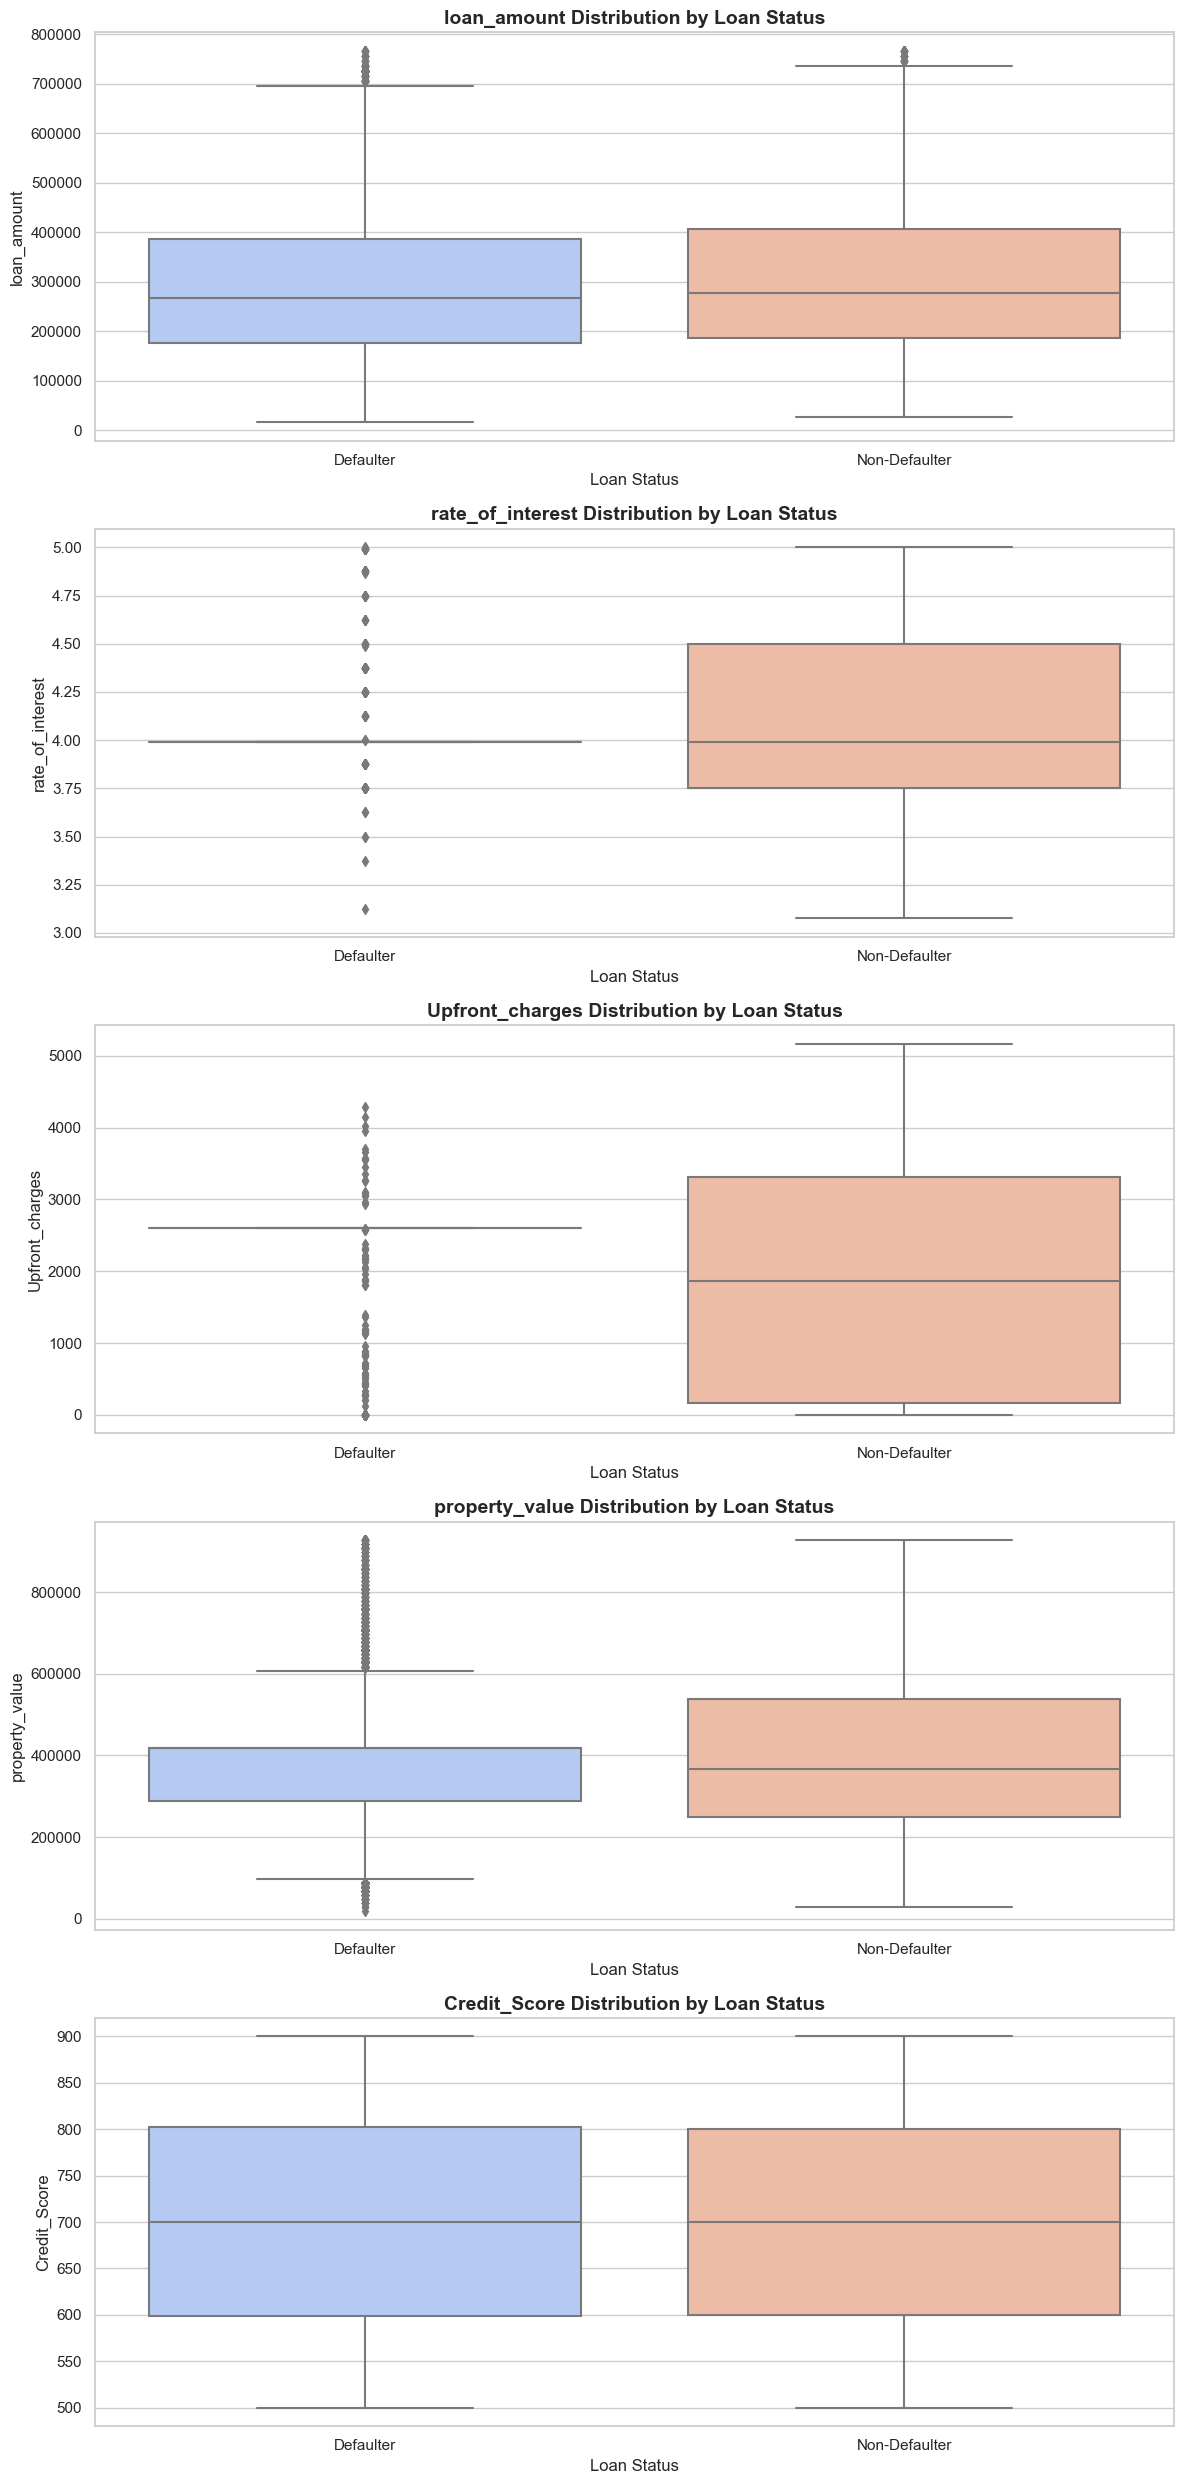

In [66]:
df1['Status'] = df1['Status'].astype(str)

# Define numeric features for analysis
numeric_features = ['loan_amount', 'rate_of_interest', 'Upfront_charges', 'property_value', 'Credit_Score']
available_features = [col for col in numeric_features if col in df1.columns]

# Set figure size for multiple subplots
fig, axes = plt.subplots(nrows=len(available_features), ncols=1, figsize=(12, 5 * len(available_features)))

# Plot box plots for each feature
for i, feature in enumerate(available_features):
    sns.boxplot(data=df1, x='Status', y=feature, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f"{feature} Distribution by Loan Status", fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Loan Status", fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)
    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()


11. Loan Default by Gender

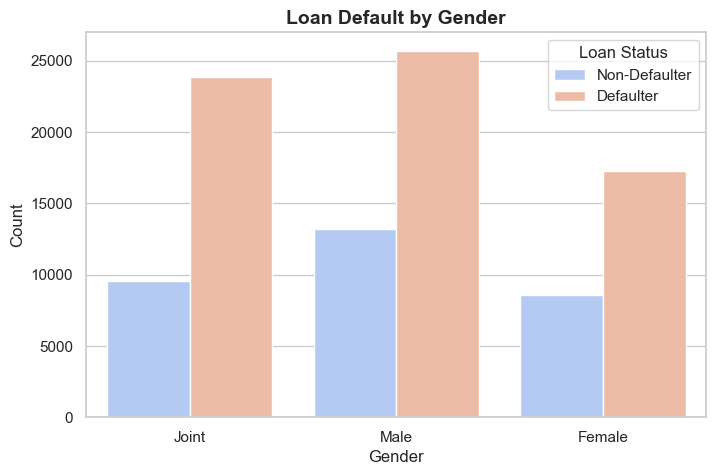

In [68]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df1, x='Gender', hue='Status', palette='coolwarm')
plt.title("Loan Default by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Loan Status", labels=["Non-Defaulter", "Defaulter"])
plt.show()


12. Proportion of Loan Defaults by Occupancy Type

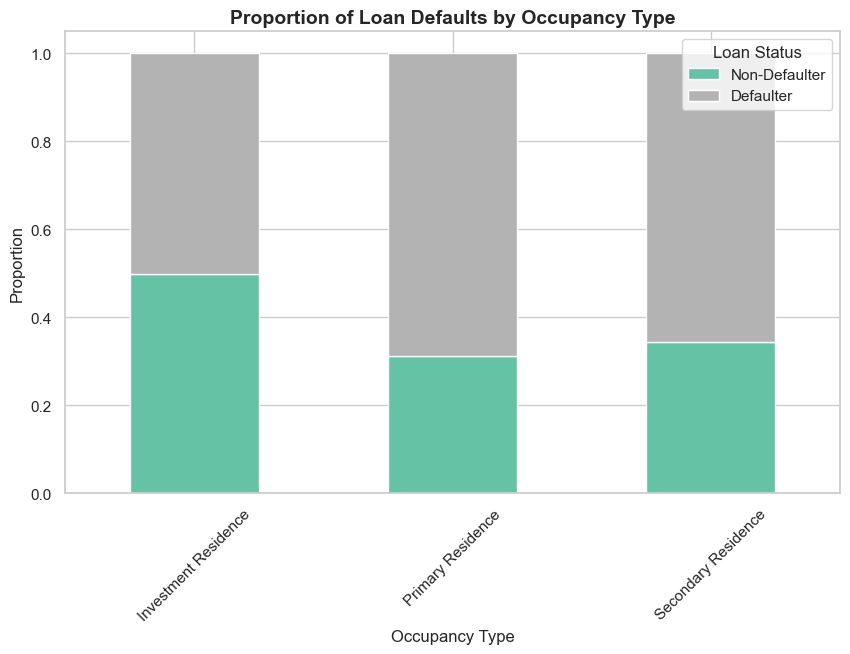

In [70]:
default_rates = df1.groupby('occupancy_type')['Status'].value_counts(normalize=True).unstack()
default_rates.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Proportion of Loan Defaults by Occupancy Type", fontsize=14, fontweight='bold')
plt.ylabel("Proportion", fontsize=12)
plt.xlabel("Occupancy Type", fontsize=12)
plt.legend(title="Loan Status", labels=["Non-Defaulter", "Defaulter"])
plt.xticks(rotation=45)
plt.show()


13.Average Loan Amount by Occupancy Type

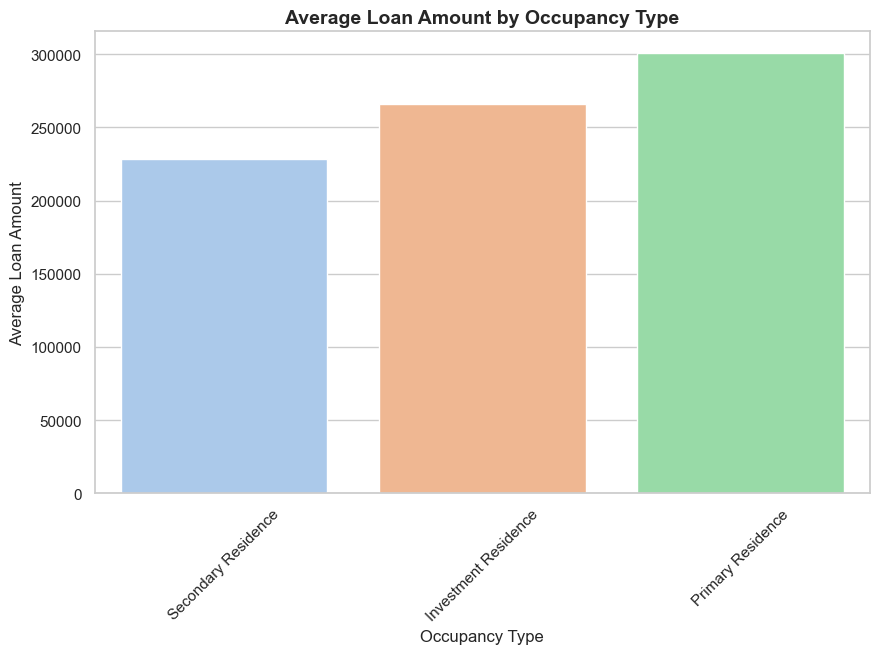

In [72]:
plt.figure(figsize=(10, 6))
avg_loan = df1.groupby('occupancy_type')['loan_amount'].mean().sort_values()
sns.barplot(x=avg_loan.index, y=avg_loan.values, palette='pastel')
plt.title("Average Loan Amount by Occupancy Type", fontsize=14, fontweight='bold')
plt.xlabel("Occupancy Type", fontsize=12)
plt.ylabel("Average Loan Amount", fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Conclusion & Recommendation 

# Final Strategic Recommendations

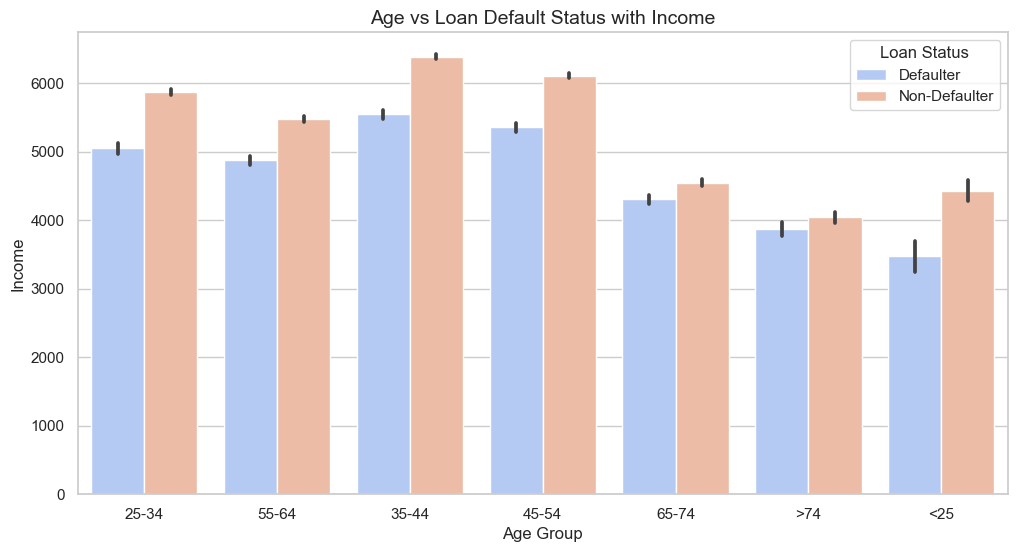

In [134]:
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(
    data=df1, 
    x="age",  # Age groups on X-axis
    y="income",  # Loan Amount on Y-axis
    hue="Status",  # Defaulter vs Non-Defaulter as colors
    palette="coolwarm"
)

# Customize labels and title
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.title("Age vs Loan Default Status with Income", fontsize=14)
plt.legend(title="Loan Status")

# Show the plot
plt.show()